In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame 
from datetime import date
import datetime as DT
import io
from scipy import stats
from sklearn.metrics import accuracy_score
import featuretools as ft

In [2]:
train = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Wazihub Soil Moisture Prediction Challenge/Train.csv")
maize = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Wazihub Soil Moisture Prediction Challenge/Context_Data_Maize.csv")
peanut =pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Wazihub Soil Moisture Prediction Challenge/Context_Data_Peanuts.csv")
submission = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Wazihub Soil Moisture Prediction Challenge/SampleSubmission.csv")
vardef = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Wazihub Soil Moisture Prediction Challenge/VariableDefinitions.csv")

In [3]:
maize.head()

,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
0,6-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,NaN,NaN,NaN
1,7-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,NaN,NaN,NaN
2,8-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,NaN,NaN,NaN
3,9-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,NaN,NaN,NaN
4,10-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,NaN,NaN,NaN


In [4]:
peanut.head()

,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
0,6-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,0.0,NaN,NaN
1,7-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,0.0,NaN,NaN
2,8-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,0.0,NaN,NaN
3,9-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,0.0,NaN,NaN
4,10-Feb,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.0,0.0,NaN,NaN


In [5]:
train.head()

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


# Soil Moisture
This dataset was collected as part of an experiment conducted using low-cost internet of things (IoT) sensors over 4 months in 4 fields growing maize and peanuts in Senegal.

An IoT sensor was placed in four distinct plots of land that were planted with either maize or peanuts (the same amount of maize is sown in each maize plot, and the same for peanuts). Plots are right next to each other, separated by a one meter perimeter.

There are three types of irrigation schedules:

Usual irrigation: water every two days

Less than crop needs: water less than every two days, i.e. the crops were irrigated in irregular intervals, giving the crops less than what was needed.

Based on water loss: Water given based on estimate water loss. Estimated water loss was calculated using different parameters including evapotranspiration and soil moisture level collected from the IoT sensors.

# Soil Moisture Objective:

The objective of this project is to accurately predict the soil moisture level multiple days in advance. 
This solution will help farmers prepare their irrigation schedules more efficiently.
You are provided with data from four fields on which to train your model.
You will need to predict, in 5-minute increments, the last four days for soil humidities in fields 1 and 3 and you will need to predict, in 5-minute increments, the last six days for soil humidities in fields 2 and 4.

# The fields were irrigated and growing crops as follows:
 Field 1: Maize, less water irrigation
 Field 2: Peanuts, irrigation based on water loss
 Field 3: Peanuts, less water irrigation
 Field 4: Peanuts, normal irrigation

Your solution needs to use one model to predict soil humidities for all four fields. This model will need to be retrained on each field individually and predict the field it was trained on without changing any parameters.

In [6]:
vardef

,Variabe Definitions,Unnamed: 1
0,NaN,NaN
1,Train,NaN
2,timestamp,Time of recording in yyyy-mmm-dd hh-mm-ss
3,Soil_humidity_1,Soil humidity of field 1
4,Irrigation field 1,"1=irrigation on, 0=irrigation off"
5,Soil_humidity_2,Soil humidity of field 2
6,Irrigation field 2,"1=irrigation on, 0=irrigation off"
7,Soil_humidity_3,Soil humidity of field 3
8,Irrigation field 3,"1=irrigation on, 0=irrigation off"
9,Soil_humidity_4,Soil humidity of field 4


In [7]:
train.info()
#less water : peanuts
#more water: maize
#two factors: underground and environment
#type of soil
#every 3 hours


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
timestamp               28049 non-null object
Soil humidity 1         8917 non-null float64
Irrigation field 1      10066 non-null float64
Soil humidity 2         26304 non-null float64
Irrigation field 2      28029 non-null float64
Soil humidity 3         16086 non-null float64
Irrigation field 3      17236 non-null float64
Soil humidity 4         26306 non-null float64
Irrigation field 4      28029 non-null float64
Air temperature (C)     23995 non-null float64
Air humidity (%)        23995 non-null float64
Pressure (KPa)          23995 non-null float64
Wind speed (Km/h)       23995 non-null float64
Wind gust (Km/h)        23995 non-null float64
Wind direction (Deg)    23995 non-null float64
dtypes: float64(14), object(1)
memory usage: 3.2+ MB


In [8]:
train.describe()

,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
count,8917.000000,10066.000000,26304.000000,28029.000000,16086.000000,17236.000000,26306.000000,28029.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000
mean,63.025653,0.177727,18.767424,0.095615,25.046062,0.245243,17.512501,0.211531,24.263780,58.521052,101.131418,9.896898,41.744905,93.983796
std,9.801099,0.382302,22.903736,0.294068,19.998016,0.430243,14.247310,0.408401,6.756751,30.073448,0.218448,4.325666,24.168987,100.502500
min,36.000000,0.000000,-45.000000,0.000000,-38.000000,0.000000,-30.000000,0.000000,11.220000,0.590000,100.500000,0.000000,0.000000,0.000000
25%,58.210000,0.000000,3.850000,0.000000,10.220000,0.000000,8.000000,0.000000,18.580000,33.980000,100.980000,6.830000,21.820000,22.500000
50%,63.000000,0.000000,23.000000,0.000000,26.610000,0.000000,19.600000,0.000000,22.150000,61.310000,101.120000,9.530000,37.240000,22.500000
75%,68.000000,0.000000,35.310000,0.000000,41.360000,0.000000,29.050000,0.000000,29.590000,86.360000,101.260000,12.460000,59.275000,180.000000
max,88.000000,1.000000,59.000000,1.000000,68.000000,1.000000,47.000000,1.000000,45.560000,96.000000,101.860000,31.360000,133.330000,337.500000


In [9]:
train.shape

(28049, 15)

In [10]:
train.dtypes

timestamp                object
Soil humidity 1         float64
Irrigation field 1      float64
Soil humidity 2         float64
Irrigation field 2      float64
Soil humidity 3         float64
Irrigation field 3      float64
Soil humidity 4         float64
Irrigation field 4      float64
Air temperature (C)     float64
Air humidity (%)        float64
Pressure (KPa)          float64
Wind speed (Km/h)       float64
Wind gust (Km/h)        float64
Wind direction (Deg)    float64
dtype: object

In [11]:
corr=train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
Soil humidity 1,1,0.170783,0.386487,0.00554034,0.307056,-0.0191048,0.0869915,0.0788947,0.127492,-0.322538,0.0153545,-0.0958728,-0.0578137,0.0378057
Irrigation field 1,0.170783,1,0.136787,0.116544,0.0360206,0.542171,0.0465533,0.157285,0.228807,-0.223633,0.0483177,0.107151,0.0835243,0.102954
Soil humidity 2,0.386487,0.136787,1,0.126485,0.476148,-0.157753,0.542874,0.250201,-0.00551207,-0.297771,0.28977,-0.172694,-0.11412,0.211908
Irrigation field 2,0.00554034,0.116544,0.126485,1,0.0155893,0.129719,-0.00775258,0.196993,0.100663,-0.12585,-0.00310816,0.0177184,-0.0209653,-0.0426402
Soil humidity 3,0.307056,0.0360206,0.476148,0.0155893,1,-0.222228,0.36516,0.0586147,-0.0150561,-0.137482,0.078811,-0.161307,-0.0546005,0.150181
Irrigation field 3,-0.0191048,0.542171,-0.157753,0.129719,-0.222228,1,-0.191147,0.0707228,0.10745,-0.0293339,0.0427428,0.146887,0.0916858,-0.000981274
Soil humidity 4,0.0869915,0.0465533,0.542874,-0.00775258,0.36516,-0.191147,1,0.210986,-0.0654487,-0.0358057,-0.0500203,-0.0825552,-0.0494848,0.062345
Irrigation field 4,0.0788947,0.157285,0.250201,0.196993,0.0586147,0.0707228,0.210986,1,0.221189,-0.309871,0.138794,-0.0024818,0.0392063,0.143722
Air temperature (C),0.127492,0.228807,-0.00551207,0.100663,-0.0150561,0.10745,-0.0654487,0.221189,1,-0.774597,-0.030314,0.478559,0.453347,0.256638
Air humidity (%),-0.322538,-0.223633,-0.297771,-0.12585,-0.137482,-0.0293339,-0.0358057,-0.309871,-0.774597,1,-0.290853,-0.266582,-0.349823,-0.262179


In [12]:
train.timestamp.unique()

array(['2019-02-23 00:00:00', '2019-02-23 00:05:00',
       '2019-02-23 00:10:00', ..., '2019-05-31 09:10:00',
       '2019-05-31 09:15:00', '2019-05-31 09:20:00'], dtype=object)

In [13]:
train.isnull().sum().sum()

87743

In [14]:
train.isnull().values.any()

True

In [15]:
train.isnull().sum()

timestamp                   0
Soil humidity 1         19132
Irrigation field 1      17983
Soil humidity 2          1745
Irrigation field 2         20
Soil humidity 3         11963
Irrigation field 3      10813
Soil humidity 4          1743
Irrigation field 4         20
Air temperature (C)      4054
Air humidity (%)         4054
Pressure (KPa)           4054
Wind speed (Km/h)        4054
Wind gust (Km/h)         4054
Wind direction (Deg)     4054
dtype: int64

In [16]:
train.shape

(28049, 15)

In [17]:
train.head().transpose()

,0,1,2,3,4
timestamp,2019-02-23 00:00:00,2019-02-23 00:05:00,2019-02-23 00:10:00,2019-02-23 00:15:00,2019-02-23 00:20:00
Soil humidity 1,67.92,67.89,67.86,67.84,67.81
Irrigation field 1,0,0,0,0,0
Soil humidity 2,55.72,55.74,55.77,55.79,55.82
Irrigation field 2,0,0,0,0,0
Soil humidity 3,-1.56,-1.51,-1.47,-1.42,-1.38
Irrigation field 3,1,1,1,1,1
Soil humidity 4,26.57,26.58,26.59,26.61,26.62
Irrigation field 4,1,1,1,1,1
Air temperature (C),19.52,19.49,19.47,19.54,19.61


In [18]:
train.nunique()

timestamp               28049
Soil humidity 1          2827
Irrigation field 1          2
Soil humidity 2          6566
Irrigation field 2          2
Soil humidity 3          6082
Irrigation field 3          2
Soil humidity 4          5150
Irrigation field 4          2
Air temperature (C)      2878
Air humidity (%)         8142
Pressure (KPa)            137
Wind speed (Km/h)        2257
Wind gust (Km/h)         4799
Wind direction (Deg)      547
dtype: int64

In [19]:
#However, even this methodology cannot be used in large areas, since the spatial and temporal variations of soil properties, terrain, and vegetation cover, make the selection of representative field sites difficult.

In [20]:
train.describe(include='all')

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
count,28049,8917.000000,10066.000000,26304.000000,28029.000000,16086.000000,17236.000000,26306.000000,28029.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000
unique,28049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-03-10 11:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,63.025653,0.177727,18.767424,0.095615,25.046062,0.245243,17.512501,0.211531,24.263780,58.521052,101.131418,9.896898,41.744905,93.983796
std,NaN,9.801099,0.382302,22.903736,0.294068,19.998016,0.430243,14.247310,0.408401,6.756751,30.073448,0.218448,4.325666,24.168987,100.502500
min,NaN,36.000000,0.000000,-45.000000,0.000000,-38.000000,0.000000,-30.000000,0.000000,11.220000,0.590000,100.500000,0.000000,0.000000,0.000000
25%,NaN,58.210000,0.000000,3.850000,0.000000,10.220000,0.000000,8.000000,0.000000,18.580000,33.980000,100.980000,6.830000,21.820000,22.500000
50%,NaN,63.000000,0.000000,23.000000,0.000000,26.610000,0.000000,19.600000,0.000000,22.150000,61.310000,101.120000,9.530000,37.240000,22.500000
75%,NaN,68.000000,0.000000,35.310000,0.000000,41.360000,0.000000,29.050000,0.000000,29.590000,86.360000,101.260000,12.460000,59.275000,180.000000


# Explore Data Analysis

One variable at a time, see the distribution, then plot it against the target!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A6FA2860>,
      dtype=object)

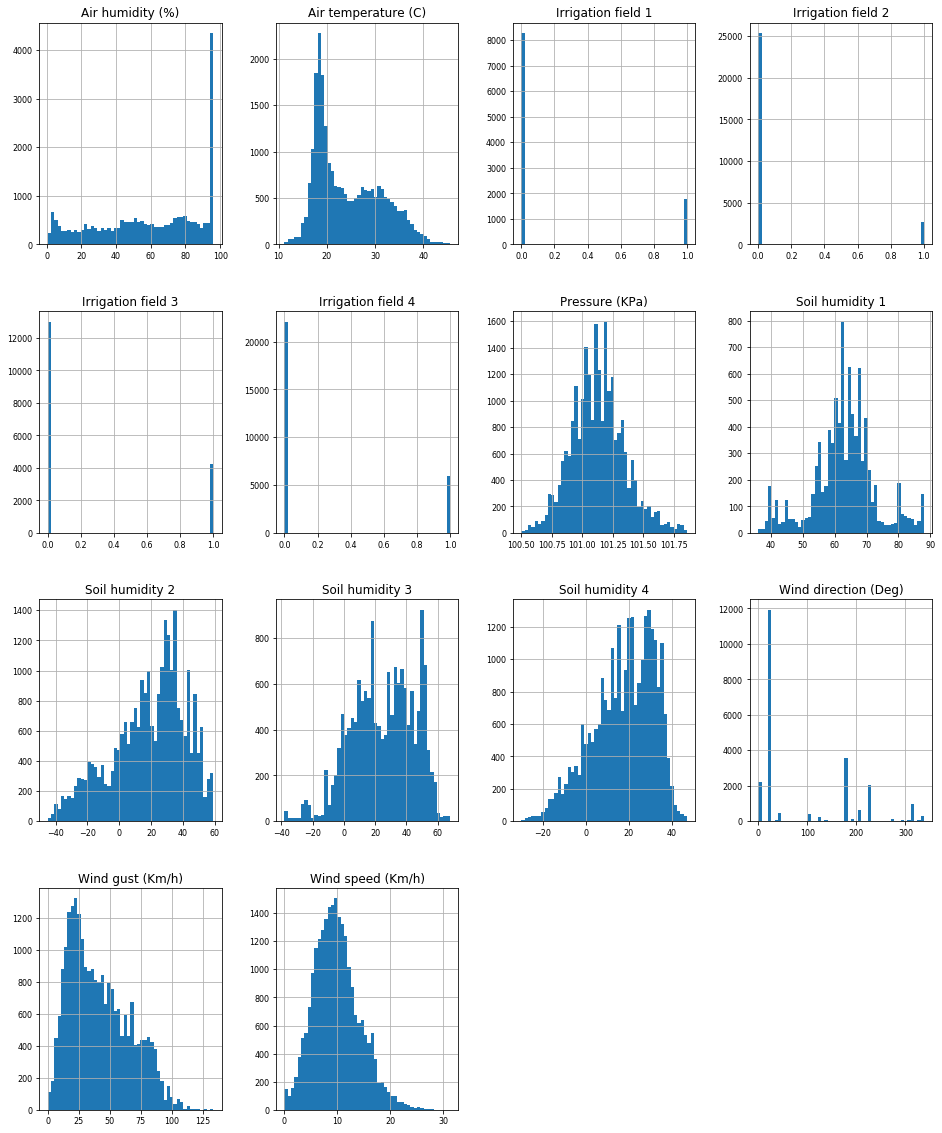

In [21]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
time = train.timestamp.hist(bins=25,figsize=[15,10])

In [ ]:
matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(train, hue='', size = 1.5)